In [1]:
import numpy as np
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" #download the data
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'] #set columns as
dataset = pd.read_csv(url, names=names) #read the dataset

In [3]:
dataset.head() #read first rows

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.tail() #read last five rows

,sepal-length,sepal-width,petal-length,petal-width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#check data type
dataset.info() #no missing data observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataset['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [7]:
X = dataset.drop('Class', axis = 1)
y = dataset['Class']

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
#Scaling data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#selecting all components and using it for training
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [11]:
explained_variance = pca.explained_variance_ratio_ #returns the variance caused by each of the principal components
print(explained_variance)

[0.72226528 0.23974795 0.03338117 0.0046056 ]


First principal component is responsible for 72.22% variance. Similarly, the second principal component causes 23.9% variance in the dataset.

In [28]:
from numpy import mean
from numpy import std
from sklearn.model_selection import  KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=2, random_state=0)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' %  (mean(scores), std(scores)))

Accuracy: 0.917 (0.075)


In [29]:
clf.fit(X_train, y_train)
# Predicting the Test set results
y_pred = clf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      0.85      0.88        13
 Iris-virginica       0.71      0.83      0.77         6

       accuracy                           0.90        30
      macro avg       0.88      0.89      0.88        30
   weighted avg       0.91      0.90      0.90        30



In [31]:
#using two pca components
pca_two = PCA(n_components=2)
X_train_two = pca_two.fit_transform(X_train)
X_test_two = pca_two.transform(X_test)

In [32]:
explained_variance = pca_two.explained_variance_ratio_ #returns the variance caused by each of the principal components
print(explained_variance)

[0.72226528 0.23974795]


In [33]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, X_train_two, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' %  (mean(scores), std(scores)))

Accuracy: 0.842 (0.115)


In [34]:
clf.fit(X_train_two, y_train)
# Predicting the Test set results
y_pred_two = clf.predict(X_test_two)

In [35]:
print(classification_report(y_test, y_pred_two))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.82      0.69      0.75        13
 Iris-virginica       0.50      0.67      0.57         6

       accuracy                           0.80        30
      macro avg       0.77      0.79      0.77        30
   weighted avg       0.82      0.80      0.81        30



In [36]:
#using one pca components
pca_one = PCA(n_components=1)
X_train_one = pca_one.fit_transform(X_train)
X_test_one = pca_one.transform(X_test)

In [37]:
explained_variance = pca_one.explained_variance_ratio_ #returns the variance caused by each of the principal components
print(explained_variance)

[0.72226528]


In [38]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, X_train_one, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' %  (mean(scores), std(scores)))

Accuracy: 0.892 (0.038)


In [39]:
clf.fit(X_train_one, y_train)
# Predicting the Test set results
y_pred_one = clf.predict(X_test_one)

In [25]:
print(classification_report(y_test, y_pred_one))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.67      0.80         6

       accuracy                           0.93        30
      macro avg       0.96      0.89      0.91        30
   weighted avg       0.94      0.93      0.93        30



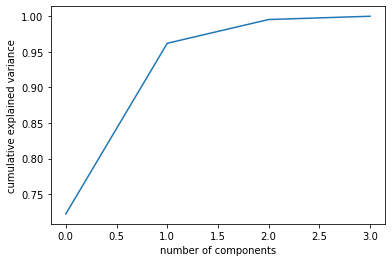

In [27]:
import matplotlib.pyplot as plt
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


A scree plot. A a scree plot expresses the variance associated with each principal component.